In [1]:
import catboost
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def _generate_data(n=100, std=0.1):
    eps = std * np.random.randn(n)
    x = np.random.rand(n) * 2*np.pi
    y = np.sin(x) + eps
    return x, y


def generate_data(n=100, std=0.1):
    x1, y1 = _generate_data(n=n, std=std)
    x2, y2 = _generate_data(n=n, std=std)
    y2 = -y2
    return np.concatenate([x1, x2]).reshape(-1, 1), np.concatenate([y1, y2])

In [3]:
x, y = generate_data(std=0.01)

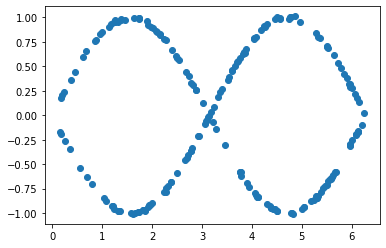

In [4]:
plt.scatter(x, y)
plt.show()

In [5]:
model = catboost.CatBoostRegressor(
    loss_function='RMSEWithUncertainty'
)

In [6]:
model.fit(x, y)

0:	learn: 1.0740595	total: 47.6ms	remaining: 47.5s
1:	learn: 1.0647143	total: 48.7ms	remaining: 24.3s
2:	learn: 1.0577168	total: 49.7ms	remaining: 16.5s
3:	learn: 1.0495220	total: 50.7ms	remaining: 12.6s
4:	learn: 1.0427715	total: 51.5ms	remaining: 10.3s
5:	learn: 1.0363537	total: 52.3ms	remaining: 8.67s
6:	learn: 1.0302168	total: 53.2ms	remaining: 7.55s
7:	learn: 1.0249091	total: 54ms	remaining: 6.69s
8:	learn: 1.0192896	total: 54.4ms	remaining: 5.99s
9:	learn: 1.0134659	total: 54.8ms	remaining: 5.42s
10:	learn: 1.0073062	total: 55.2ms	remaining: 4.96s
11:	learn: 1.0024379	total: 55.5ms	remaining: 4.57s
12:	learn: 0.9965872	total: 55.9ms	remaining: 4.24s
13:	learn: 0.9913698	total: 56.2ms	remaining: 3.96s
14:	learn: 0.9857147	total: 56.6ms	remaining: 3.71s
15:	learn: 0.9817807	total: 56.9ms	remaining: 3.5s
16:	learn: 0.9781240	total: 57.3ms	remaining: 3.31s
17:	learn: 0.9748086	total: 57.6ms	remaining: 3.14s
18:	learn: 0.9706734	total: 58ms	remaining: 2.99s
19:	learn: 0.9663179	total:

464:	learn: 0.4801738	total: 244ms	remaining: 281ms
465:	learn: 0.4794188	total: 244ms	remaining: 280ms
466:	learn: 0.4781861	total: 245ms	remaining: 279ms
467:	learn: 0.4774691	total: 245ms	remaining: 279ms
468:	learn: 0.4760608	total: 246ms	remaining: 278ms
469:	learn: 0.4756879	total: 246ms	remaining: 277ms
470:	learn: 0.4750594	total: 246ms	remaining: 277ms
471:	learn: 0.4743518	total: 247ms	remaining: 276ms
472:	learn: 0.4736051	total: 247ms	remaining: 275ms
473:	learn: 0.4726331	total: 247ms	remaining: 275ms
474:	learn: 0.4718964	total: 248ms	remaining: 274ms
475:	learn: 0.4706982	total: 248ms	remaining: 273ms
476:	learn: 0.4698434	total: 249ms	remaining: 273ms
477:	learn: 0.4691773	total: 249ms	remaining: 272ms
478:	learn: 0.4684624	total: 249ms	remaining: 271ms
479:	learn: 0.4676143	total: 250ms	remaining: 271ms
480:	learn: 0.4666593	total: 250ms	remaining: 270ms
481:	learn: 0.4659962	total: 251ms	remaining: 269ms
482:	learn: 0.4653209	total: 251ms	remaining: 269ms
483:	learn: 

924:	learn: 0.1476344	total: 425ms	remaining: 34.5ms
925:	learn: 0.1470640	total: 426ms	remaining: 34ms
926:	learn: 0.1463068	total: 426ms	remaining: 33.6ms
927:	learn: 0.1454279	total: 427ms	remaining: 33.1ms
928:	learn: 0.1445768	total: 427ms	remaining: 32.6ms
929:	learn: 0.1437504	total: 427ms	remaining: 32.2ms
930:	learn: 0.1434786	total: 428ms	remaining: 31.7ms
931:	learn: 0.1432370	total: 428ms	remaining: 31.2ms
932:	learn: 0.1425890	total: 429ms	remaining: 30.8ms
933:	learn: 0.1422200	total: 429ms	remaining: 30.3ms
934:	learn: 0.1413939	total: 429ms	remaining: 29.8ms
935:	learn: 0.1408026	total: 430ms	remaining: 29.4ms
936:	learn: 0.1404983	total: 430ms	remaining: 28.9ms
937:	learn: 0.1402292	total: 431ms	remaining: 28.5ms
938:	learn: 0.1397858	total: 431ms	remaining: 28ms
939:	learn: 0.1390213	total: 431ms	remaining: 27.5ms
940:	learn: 0.1379744	total: 432ms	remaining: 27.1ms
941:	learn: 0.1374816	total: 432ms	remaining: 26.6ms
942:	learn: 0.1372783	total: 432ms	remaining: 26.1

In [12]:
x_sort = np.linspace(0, 2*np.pi, 200).reshape(-1, 1)

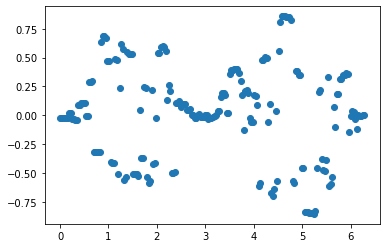

In [14]:
y_hat = model.predict(x_sort)

plt.scatter(x_sort, y_hat[:, 0])
plt.show()

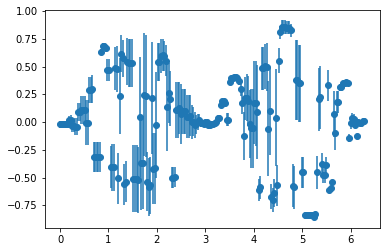

In [15]:
y_params = model.predict(x_sort)

plt.errorbar(x_sort, y_params[:, 0], yerr=y_params[:, 1], fmt='o')
plt.show()

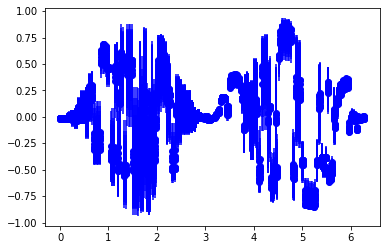

In [30]:
y_params_ensemble = model.virtual_ensembles_predict(x_sort)

for idx in range(y_params_ensemble.shape[1]):
    params = y_params_ensemble[:, idx, :]
    plt.errorbar(x_sort, params[:, 0], yerr=params[:, 1], fmt='bo')
    
plt.show()